1. Pytorch简介
--------------

PyTorch是一个基于Torch的Python开源机器学习库，用于自然语言处理等应用程序。
它主要由Facebook的人工智能研究小组开发。PyTorch和Google的Tensorflow是目前最火的的两个深度学习框架。

PyTorch和Torch都使用相同的C库：TH, THC, THNN,
THCUNN。Torch使用LUA作为上层包装语言，而PyTorch使用Python。

PyTorch是一个Python包，提供两个高级功能：

-   具有强大的GPU加速的张量计算（如NumPy）
-   包含自动求导系统的的深度神经网络

### 1.1 安装

``` shell
pip install -U torch torchvision
```

检查安装

``` python
import torch
print(torch.__version__)
```

### 1.2 Tensor

Tensor和 NumPy ndarray非常相似，不同的是，Tensor可以使用GPU来加速计算。

#### 创建Tensor

``` python
import torch
import numpy as np

t = torch.tensor([10, 20, 30, 40, 50], dtype=torch.float) 
print("tensor={} \ntensor.dtype={} \ntensor.type={} \ntype={}".format(t, t.dtype, t.type(), type(t)))
print("-"*50)

a = np.array([10, 20, 30, 40, 50], dtype=np.float) 
print("array={} \narray.dtype={} \narray.type={}".format(a, a.dtype, type(a)))      
print("-"*50)

t = torch.rand(5, 3, dtype=torch.double)
print("tensor={} \ntensor.dtype={} \ntensor.type={} \ntype={}".format(t, t.dtype, t.type(), type(t)))
print("-"*50)

a = np.random.rand(5, 3)
print("array={} \narray.dtype={} \narray.type={}".format(a, a.dtype, type(a)))
print("-"*50)

```

#### CUDA张量

``` python
import numpy as np
import torch

x = torch.tensor([10, 20, 30], dtype=torch.double) 
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA 设备对象
    y = torch.ones_like(x, device=device)  # 直接从GPU创建张量
    x = x.to(device)                       # 将张量移动到cuda中
    z = torch.rand(3).cuda()
    s = x + y + z
    print(s)
    print(s.to("cpu", torch.double))       # 对变量的类型做更改
```

#### Tensor vs. tensor

创建Tensor有两种方法。它们有一些细微差别。其中torch.Tensor是python类，是默认张量类型torch.FloatTensor()的别名。而torch.tensor()是python函数。

``` python
import torch

t1 = torch.Tensor([1, 2])
print("tensor={} \ntensor.dtype={} \ntensor.type={} \ntype={}".format(t1, t1.dtype, t1.type(), type(t1)))
print("-"*50)

t2 = torch.tensor([1, 2])
print("tensor={} \ntensor.dtype={} \ntensor.type={} \ntype={}".format(t2, t2.dtype, t2.type(), type(t2)))
print("-"*50)

t2 = torch.tensor([1., 2.])
print("tensor={} \ntensor.dtype={} \ntensor.type={} \ntype={}".format(t2, t2.dtype, t2.type(), type(t2)))
print("-"*50)
```

结果如下

    tensor=tensor([1., 2.]) 
    tensor.dtype=torch.float32 
    tensor.type=torch.FloatTensor 
    type=<class 'torch.Tensor'>
    --------------------------------------------------
    tensor=tensor([1, 2]) 
    tensor.dtype=torch.int64 
    tensor.type=torch.LongTensor 
    type=<class 'torch.Tensor'>
    --------------------------------------------------
    tensor=tensor([1., 2.]) 
    tensor.dtype=torch.float32 
    tensor.type=torch.FloatTensor 
    type=<class 'torch.Tensor'>
    --------------------------------------------------

#### numpy vs. torch

| 操作                               | numpy                      | torch                              |
|------------------------------------|:---------------------------|------------------------------------|
| empty                              | np.empty(\[5, 3\])         | torch.empty(5, 3)                  |
| rand 均匀分布                      | np.random.rand(5, 3)       | torch.rand(5, 3, dtype=torch.long) |
| randn 正态分布                     | np.random.randn(5, 3)      | torch.randn(5, 3)                  |
| zeros                              | np.zeros(\[5, 3\])         | torch.zeros(5, 3)                  |
| ones                               | np.ones(\[5, 3\])          | torch.ones(5, 3)                   |
| construct from data                | np.array(\[5.5, 3\])       | torch.Tensor(\[5.5, 3\])           |
| contruct: 使用原对象的shape和dtype | np.random.randn(\*x.shape) | torch.randn\_like(x)               |
| shape                              | x.shape                    | x.size() or x.shape                |
| 加法/减法                          | x + y，x - y               | x + y，x - y                       |
| 点乘                               | x \* y                     | x \* y                             |
| 乘法（叉乘）                       | x.dot(y) or x @ y          | x.mm(y) or x @ y                   |
| adds x to y                        |                            | y.add\_(x)                         |
| 获取部分数据                       | x\[:, 1\]                  | x\[:, 1\]                          |
| reshape                            | x.reshape((-1, 3))         | x.view(-1, 4) or x.reshape(-1, 3)  |
| 转置                               | x.T                        | x.t() or x.T                       |
| 向量长度（范数）                   | np.linalg.norm(x)          | x.norm()                           |
| 逆矩阵                             | np.linalg.inv(A)           | torch.inverse(A)B                  |
| 垂直方向拼接(行增)                 | np.vstack(A, B)            | torch.cat((A, B), 0)               |
| 水平方向拼接(列增)                 | np.hstack(A, B)            | torch.cat((A, B), 1)               |

**array和tensor之前的转换**

无论如何转化，这些对象共享内存。

``` python
import torch
import numpy as np

numpy_x = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
tensor_x = torch.from_numpy(numpy_x)
print("numpy_x = {}".format(numpy_x))
print("tensor_x = {}".format(tensor_x))

numpy_x_from_tensor = tensor_x.numpy()
print("numpy_x_from_tensor = {}".format(numpy_x_from_tensor))

numpy_x_from_tensor[1] = 98
print("-"*50)
print("after change the value of one element.")
print("numpy_x = {}".format(numpy_x))
print("tensor_x = {}".format(tensor_x))
print("numpy_x_from_tensor = {}".format(numpy_x_from_tensor))
```

#### view vs. reshape

view():

-   返回具有新形状的张量.返回的张量将与原始张量共享数据.

reshape():

-   优先执行view()，如果不满足条件，则clone一个。

> 什么条件

### 1.3 Autograd：自动求导

PyTorch 中神经网络的核心是 `autograd` 包。
`autograd`包为张量上的所有操作提供了自动求导。
它是一个在运行时定义的框架，这意味着反向传播是根据你的代码来确定如何运行，并且每次迭代可以是不同的。下面是张量自动求导的几个重要属性。

-   requires\_grad：当requires\_grad`为`True，在完成（Forward）计算后，并调用backward()后，则自动计算所有的梯度。
-   grad：梯度
-   grad\_fn：梯度函数

下面是一个例子。

计算公式： $$
\mathbf {y} = 2 \mathbf x + 1 \\
\mathbf {z} = \mathbf y^2 + 1 \\
\mathbf {out} = \frac 1 4  \sum \mathbf  {z}
$$ 可以得到： $$
\mathbf {out} = \frac 1 4  \sum   {(2 \mathbf x+1)^2+1}
$$ 梯度计算公式： $$
\frac{\partial \mathbf {out} }{\partial \mathbf {x} } = \mathbf y =  \begin{bmatrix}
3 & 5 \\
7 & 9
\end{bmatrix}
$$

``` python
import torch

def compute():
    x = torch.tensor([[1, 2],[3, 4]], dtype=torch.double, requires_grad=True)
    y = 2 * x + 1
    z = y * y + 1
    out = z.mean()
    return {'x':x, 'y':y, 'z':z, 'out':out}

def print_tensor(key, tensor):
    print("{}={}".format(key, tensor))
    print("  grad_fn={} \n  grad={} \n  requires_grad={}\n  is_leaf={} \n  dtype={}".format(
        tensor.grad_fn, tensor.grad, 
        tensor.requires_grad, tensor.is_leaf, tensor.dtype))
    print("-"*50)    

def print_tensors(tensors):
    for key, tensor in tensors.items():
        print_tensor(key, tensor)

tensors = compute()
tensors['out'].backward()
print_tensors(tensors)
```

默认情况下，仅leaf的tensor才会保留grad。可以手工设置打开。

``` python
tensors = compute()
for _, tensor in tensors.items():
    tensor.retain_grad()
tensors['out'].backward()
print_tensors(tensors)
```

上面例子中backward的tensor是一个标量，所以其导数肯定为1。如果它是一个维度更高的tensor，则可以指定一个相同维度导数（可以看成是下一步梯度计算带来的），然后进行反向传播计算。

``` python
tensors = compute()
gradients = torch.tensor([[0.5, 1], [2, 4]], dtype=torch.float)
tensors['z'].backward(gradients)
print_tensors(tensors)
```

梯度计算公式: $$
\frac{\partial \mathbf {z} }{\partial \mathbf {x} } \circ  \mathbf {gradients} = 4\mathbf y  \circ \begin{bmatrix}
0.5 & 1 \\
2 & 4 
\end{bmatrix} =  \begin{bmatrix}
6 & 20 \\
56 & 144
\end{bmatrix}
$$

> 自动求导思路很简单，但是异常强大。从细微入手，把复杂的计算图分解到一层一层中来进行求导，每一层都非常简单，但组合起来千变万化。真如如庖丁解牛。

其它
----

#### torch.nn.Conv2d

https://pytorch.org/docs/stable/nn.html?highlight=conv2d\#torch.nn.Conv2d

    CLASStorch.nn.Conv2d(
      in_channels,  # 输入通道数
      out_channels, # 输出通道数
      kernel_size,  # 卷积核大小
      stride=1,     # 滑动窗口，默认为1，指每次卷积对原数据滑动1个单元格
      padding=0,    # 两边的空白填充（一般补0）
      dilation=1,   # 卷积核内部之间的间隔，默认1
      groups=1,     # 将输入数据分组，通常不用管这个参数，没有太大意义
      bias=True, 
      padding_mode='zeros'
    )

-   input size: $(N,C_{in}, H_{in},W_{in})$

    -   $N$：batch size。也就是每次训练所使用的样本个数
    -   $C_{in}$： 输入channel数量
    -   $H_{in}$：输入图片的(像素)高度
    -   $W_{in}$： 输入图性的(像素)宽度

-   output size: $(N,C_{out}, H_{out},W_{out})$

    -   $N$：batch size。也就是每次训练所使用的样本个数
    -   $C_{out}$： 输出channel数量
    -   $H_{out}$：输出图片的(像素)高度
    -   $W_{out}$：输出图片的(像素)宽度

-   dilation：卷积核内部之间的间隔，默认为1，其卷积核如下图所示：

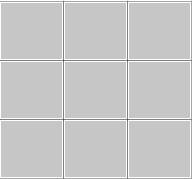

​
如果dilation=2，则如下图所示，dilation表示的是灰色格子之间的序号的间隔。

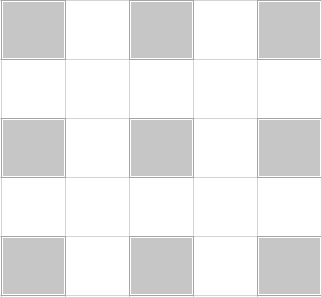

-   输出的size大小

    设$$\mathbf {S_{in}} = \begin{bmatrix} H_{in} & W_{in} \end{bmatrix}  $$，$$ \mathbf {S_{out} }= \begin{bmatrix} H_{out} & W_{out} \end{bmatrix}  $$，则
    $$
    \mathbf {S_{out}} = \lfloor \frac {\mathbf { S_{in}} + 2\mathbf p  - \mathbf d \circ (\mathbf k -1 ) - 1} { \mathbf s}  + 1 \rfloor
    $$ 其中$p$表示padding，$d$表示dilation，$k$表示kernal
    size，$s$表示stride。

    上面的公式中，可以这样逐步理解

    1.  \$d (k -1 ) - 1 \$- 表示卷积核所占的空间，
    2.  $\mathbf { S_{in}} + 2\mathbf p - \mathbf d \circ (\mathbf k -1 ) - 1$表示减去一个卷积核所占空间
    3.  $\frac {\mathbf { S_{in}} + 2\mathbf p - \mathbf d \circ (\mathbf k -1 ) - 1} { \mathbf s}$
        表示剩下空间可以容纳几个卷积核
    4.  $+ 1$：表示把第2步减去的卷积核，再加回来。

#### 

Resource
--------

-   [Deep-Learning-with-PyTorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
-   [pytorch handbook](https://github.com/zergtant/pytorch-handbook)
-   [pytorch-tutorial](https://github.com/yunjey/pytorch-tutorial)
-   [动手学深度学习（PyTorch版）](https://tangshusen.me/Dive-into-DL-PyTorch/)